In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import graphviz

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, Y_train)

Y_pred = Decision_Tree.predict(X_test)

print(f'True : {Y_test}\nPred : {Y_pred}')

True : [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
Pred : [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [6]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9666666666666667


In [7]:
confusion = confusion_matrix(Y_test, Y_pred)
confusion_DF = pd.DataFrame(confusion, columns = ['Pred_0', 'Pred_1', 'Pred_2'])
confusion_DF.index = ['True_0', 'True_1', 'True_2']

confusion_DF

,Pred_0,Pred_1,Pred_2
True_0,11,0,0
True_1,0,12,1
True_2,0,0,6


In [8]:
# .dot 파일로 export 해 줌
export_graphviz(Decision_Tree, out_file='tree.dot', 
                class_names = iris.target_names, 
                feature_names=iris.feature_names, 
                impurity=True, # gini 출력
                filled =True) # class별 color 채우기

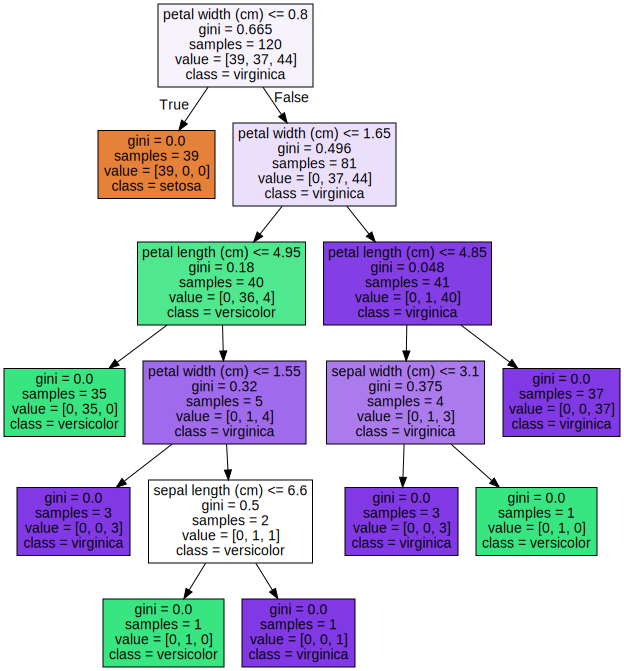

In [9]:
with open('./tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph) #dot_graph의 source저장



---



---



## **Decision Tree의 과적합 방지**


*   max_depth : 트리 최대 깊이
*   mean_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
*   mean_samples_leaf : leaf node가 가지고 있어야 할 최소 샘플 수



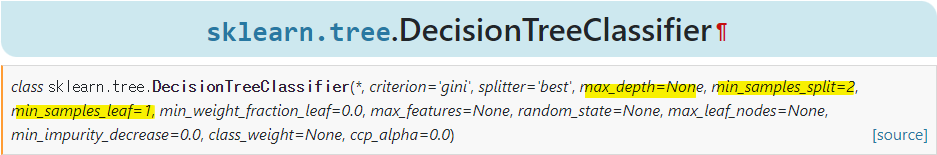




In [10]:
Decision_Tree_md = DecisionTreeClassifier(max_depth=3 ,random_state=1)
Decision_Tree_md.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

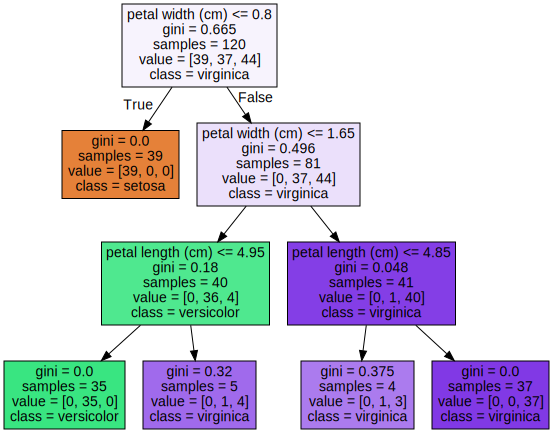

In [11]:
export_graphviz(Decision_Tree_md, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



---



In [12]:
Decision_Tree_ms = DecisionTreeClassifier(min_samples_split=4 ,random_state=1) 
Decision_Tree_ms.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=1)

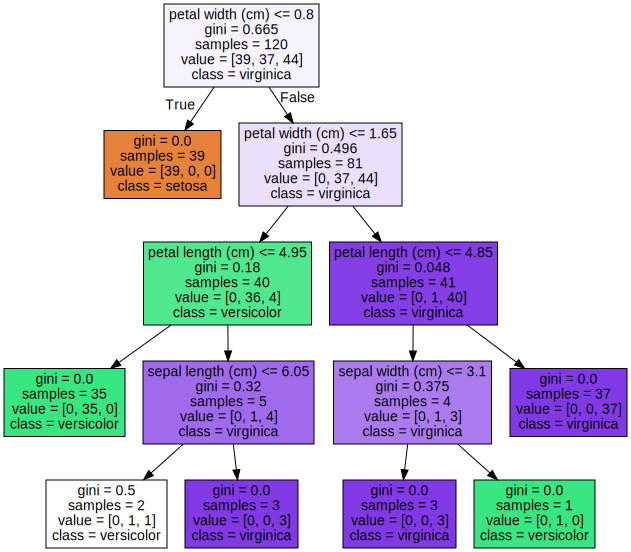

In [13]:
export_graphviz(Decision_Tree_ms, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#sample 갯수가 3인 경우 샘플 내 상이한 값이 있어도 더 이상 분할하지 않음



---



In [14]:
Decision_Tree_ml = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=1) #leaf node가 될 수 있는 샘플 데이터의 최소 갯수 지정
Decision_Tree_ml.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=1)

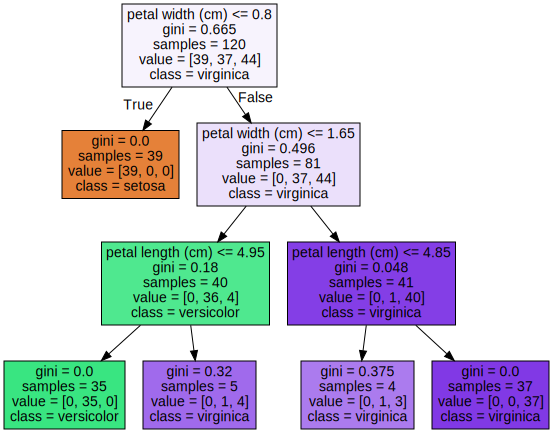

In [15]:
export_graphviz(Decision_Tree_ml, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



---





### **Using Entropy instead of Gini**

In [16]:
Decision_Tree_entropy = DecisionTreeClassifier(random_state=1, criterion="entropy")
Decision_Tree_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

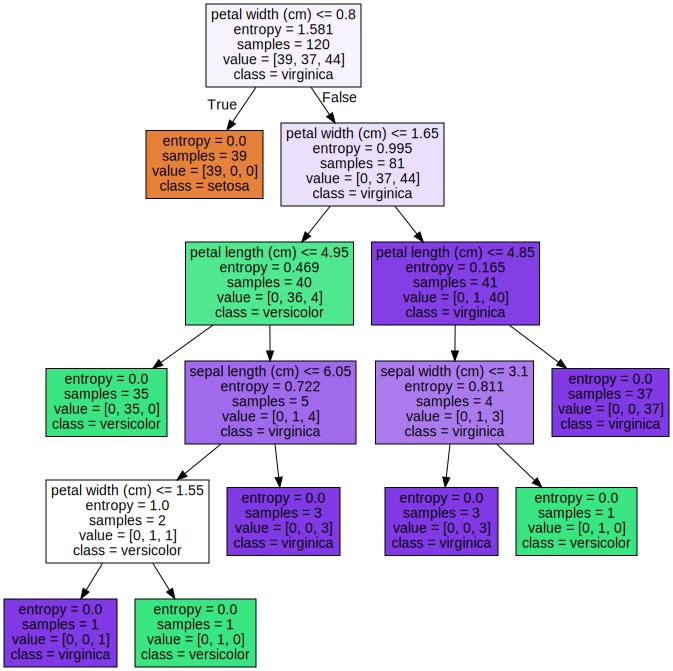

In [17]:
export_graphviz(Decision_Tree_entropy, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## **Hyper-parameter Tuning**

In [18]:
dt = DecisionTreeClassifier(random_state=1)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params = {
    'max_depth': [2, 3, 4, 7],
    'min_samples_leaf': [3, 4, 7, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [21]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params,
                           cv=4, scoring = "accuracy")

In [22]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 7],
                         'min_samples_leaf': [3, 4, 7, 10, 20]},
             scoring='accuracy')

In [23]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001691,0.000297,0.000859,0.000077,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
1,0.001182,0.000212,0.000697,0.000128,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
2,0.000834,0.000031,0.000493,0.000010,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
3,0.000826,0.000038,0.000490,0.000006,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
4,0.000815,0.000006,0.000476,0.000009,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7


In [24]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.000910,0.000106,0.000558,0.000033,gini,3,3,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
10,0.000825,0.000009,0.000495,0.000012,gini,4,3,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
15,0.000865,0.000046,0.000516,0.000019,gini,7,3,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
25,0.000850,0.000028,0.000514,0.000039,entropy,3,3,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
30,0.000848,0.000011,0.000490,0.000010,entropy,4,3,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1


In [25]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=1)

In [26]:
dt_best=grid_search.best_estimator_

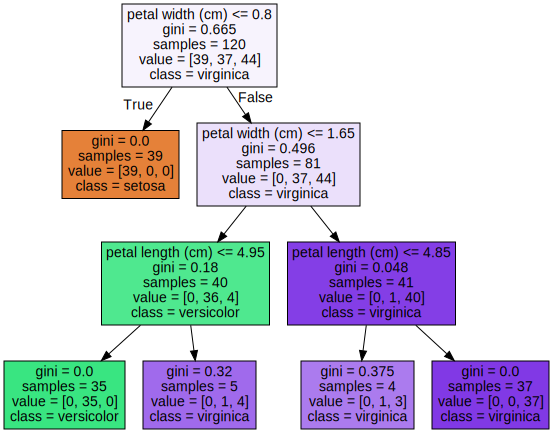

In [27]:
export_graphviz(dt_best, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# **퀴즈 1**


*   최대 깊이가 4인 Decision Tree를 시각화하시오. (단, gini index가 아닌 entropy를 사용할 것)


In [29]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, Y_train)

Y_pred = Decision_Tree.predict(X_test)

print(f'True : {Y_test}\nPred : {Y_pred}')

True : [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
Pred : [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [31]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9666666666666667


In [32]:
Decision_Tree_md2 = DecisionTreeClassifier(max_depth=4 ,random_state=1, criterion="entropy")
Decision_Tree_md2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

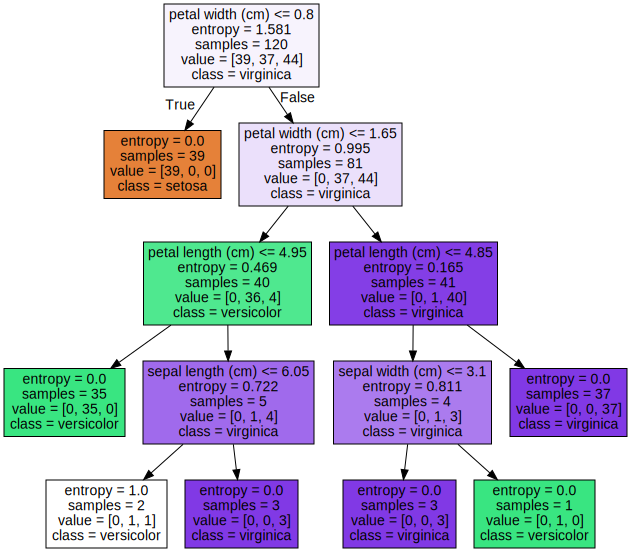

In [33]:
export_graphviz(Decision_Tree_md2, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)